In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### How might we predict the winner of an EPL soccer match for fans in a way that utilizes a modified Google PageRank algorithm leveraging game performance from previous games so that we can provide more accurate predictions that adjust with each game week.

In [23]:
week_num = 4

In [24]:
G = nx.DiGraph()
df = pd.read_csv('final_2024.csv')
df['cost'] = (df['Home Score'] - df['Away Score'])

last_three = [week_num-3,week_num-2,week_num-1]

df = df[df['Wk'].isin(last_three)]

In [25]:
edgelist = list(zip(df['Home'], df['Away'], df['cost']))

mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)


nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))


for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
    # G.add_edge(team2, team1, weight=-weight)


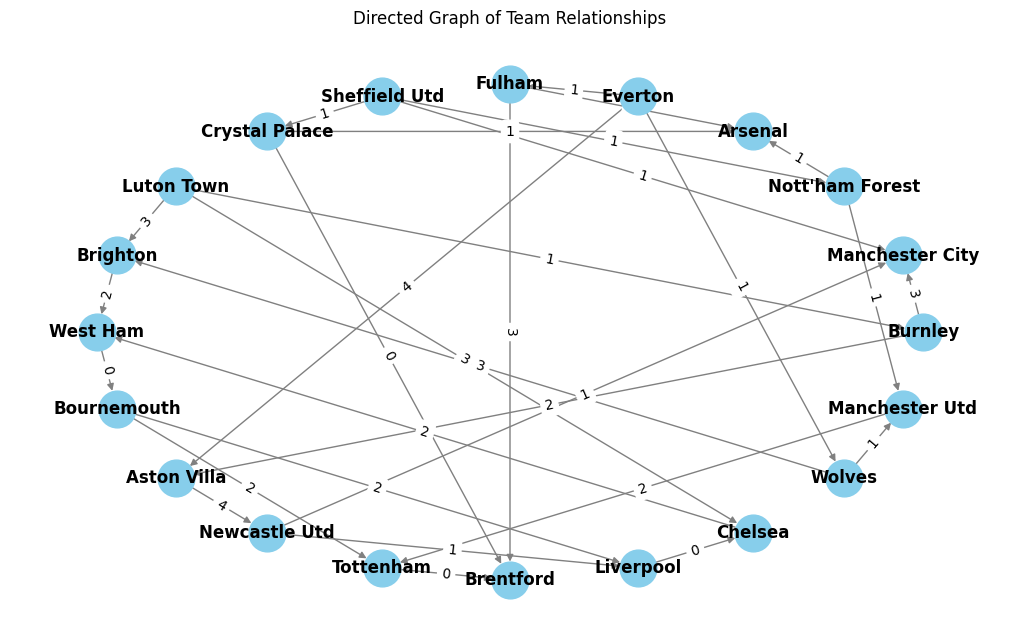

In [26]:
edge_labels = nx.get_edge_attributes(G, 'weight')

pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()

In [ ]:
# Teams and their xG values
teams = df['Home'] + df['Away']
xG_values = [1.2, 2.8, 3.0, 1.0]

# Compute the total xG
total_xG = sum(xG_values)

# Create the personalization vector as a dictionary
personalization_vector = {team: xG / total_xG for team, xG in zip(teams, xG_values)}

print(personalization_vector)


In [28]:
nx.pagerank(G)

{'Burnley': 0.03043495456761946,
 'Manchester City': 0.08098359424757712,
 "Nott'ham Forest": 0.034829052674066295,
 'Arsenal': 0.07154676424494971,
 'Everton': 0.027139380987784338,
 'Fulham': 0.030984216830925317,
 'Sheffield Utd': 0.027139380987784338,
 'Crystal Palace': 0.034829052674066295,
 'Luton Town': 0.027139380987784338,
 'Brighton': 0.05677882818864826,
 'West Ham': 0.10687327509321788,
 'Bournemouth': 0.027139380987784338,
 'Aston Villa': 0.05286677160318906,
 'Newcastle Utd': 0.07207573523887888,
 'Tottenham': 0.07992111907083131,
 'Brentford': 0.05347634960292907,
 'Liverpool': 0.06930635922645688,
 'Chelsea': 0.037026101727289706,
 'Wolves': 0.030984216830925317,
 'Manchester Utd': 0.04852608422729231}